In [308]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from scipy.stats import norm
from scipy import stats
%matplotlib inline

# **Predicting stock prices using historical data like stock prices (AAPL and TSLA)**
#

# *Objectives*
# Compare the performances of LSTM and XGBOOST model in forecasting stock prices

# XGBoost is showcase it is strength in its ability to efficienctly and accurately model complex relationships in structured data and providing insights into feature importance while LSTM is better for capturing temporal dependecies in sequential data.

# dataset Preparation and Exploration

In [370]:
aapl = pd.read_csv("/Users/tony/Documents/ml/L&LSTM /AAPL.csv")
tsla = pd.read_csv("/Users/tony/Documents/ml/L&LSTM /TSLA.csv")

# AAPL dataset

In [371]:
aapl.head(-1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
...,...,...,...,...,...,...,...
10830,2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400
10831,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
10832,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400
10833,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300


In [159]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10836 non-null  object 
 1   Open       10836 non-null  float64
 2   High       10836 non-null  float64
 3   Low        10836 non-null  float64
 4   Close      10836 non-null  float64
 5   Adj Close  10836 non-null  float64
 6   Volume     10836 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 592.7+ KB


In [160]:
aapl.shape

(10836, 7)

In [161]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10836.000000,10836.000000,10836.000000,10836.000000,10836.000000,1.083600e+04
mean,19.783697,20.002122,19.574328,19.797366,19.045572,3.219041e+08
std,41.396815,41.861870,40.966144,41.435703,41.030076,3.364615e+08
min,0.049665,0.049665,0.049107,0.049107,0.038000,0.000000e+00
25%,0.294643,0.301339,0.287332,0.294643,0.241206,1.164436e+08
50%,0.508929,0.516183,0.500000,0.508371,0.417317,2.094288e+08
75%,18.786697,18.965447,18.640090,18.800624,16.369706,4.017468e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,7.421641e+09


In [162]:
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl.set_index('Date',inplace=True)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


# *Closing Price*
This is the last price at which the stock is traded during the regular trading day.It is a standard benchmark used by investors to track its performance over time.


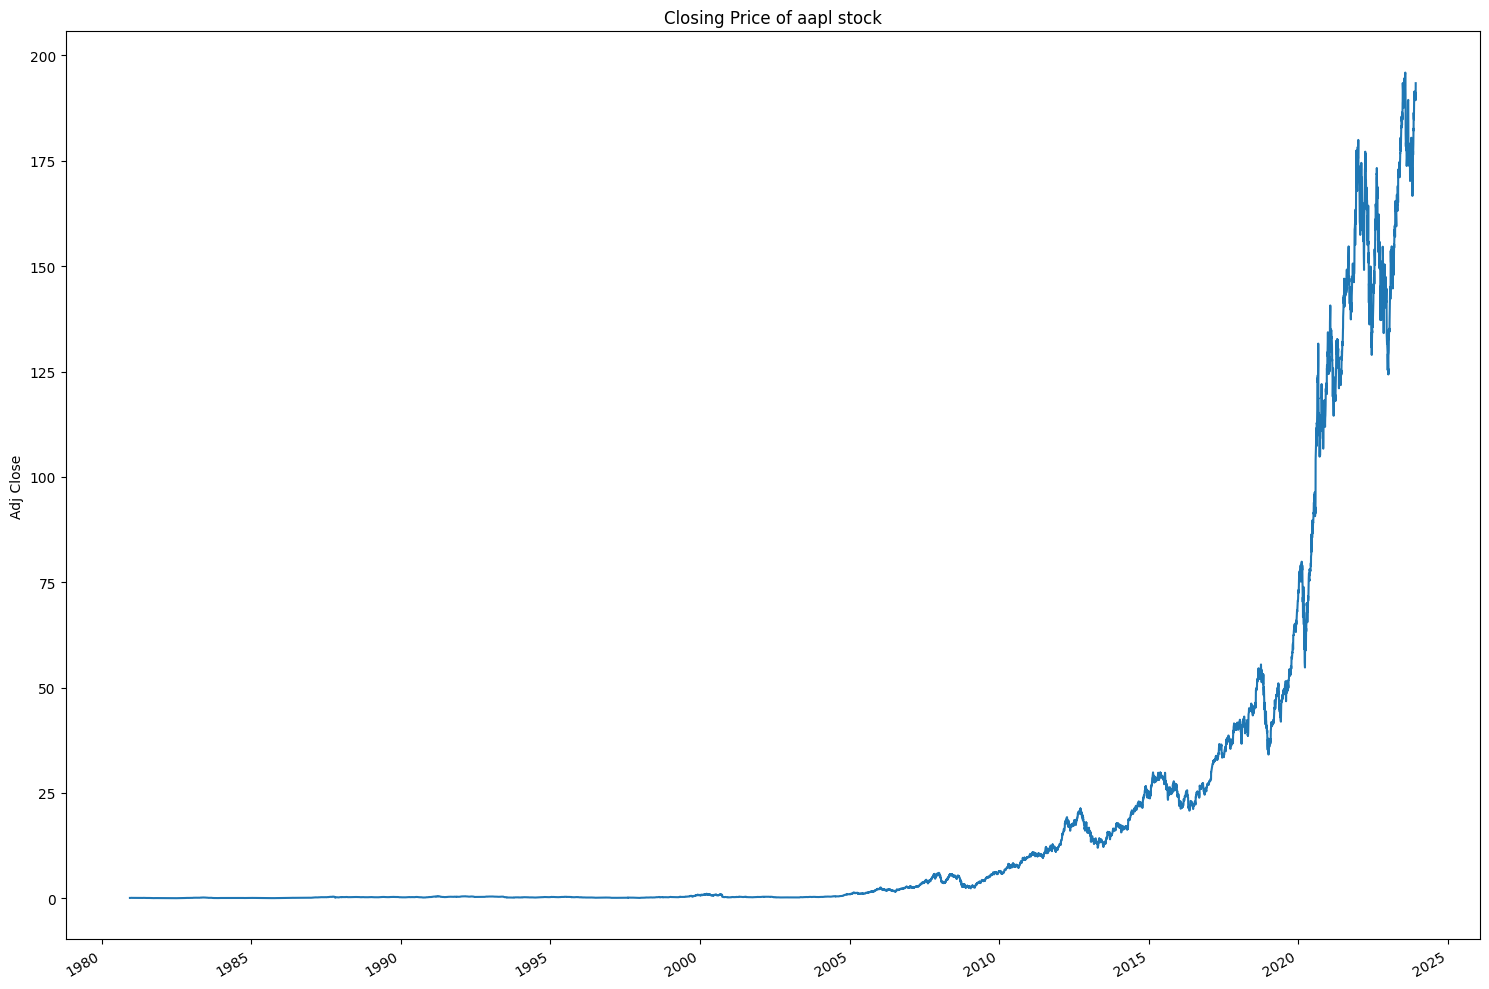

In [91]:
plt.figure(figsize=(15,10))
aapl['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of aapl stock")
plt.tight_layout()
plt.show()

# *Volume of Sales*
Volume is the number of an asset or security which changes hands over a specific period of time like a day.Trading volume and changes to volume over the course of time are important for technical traders.


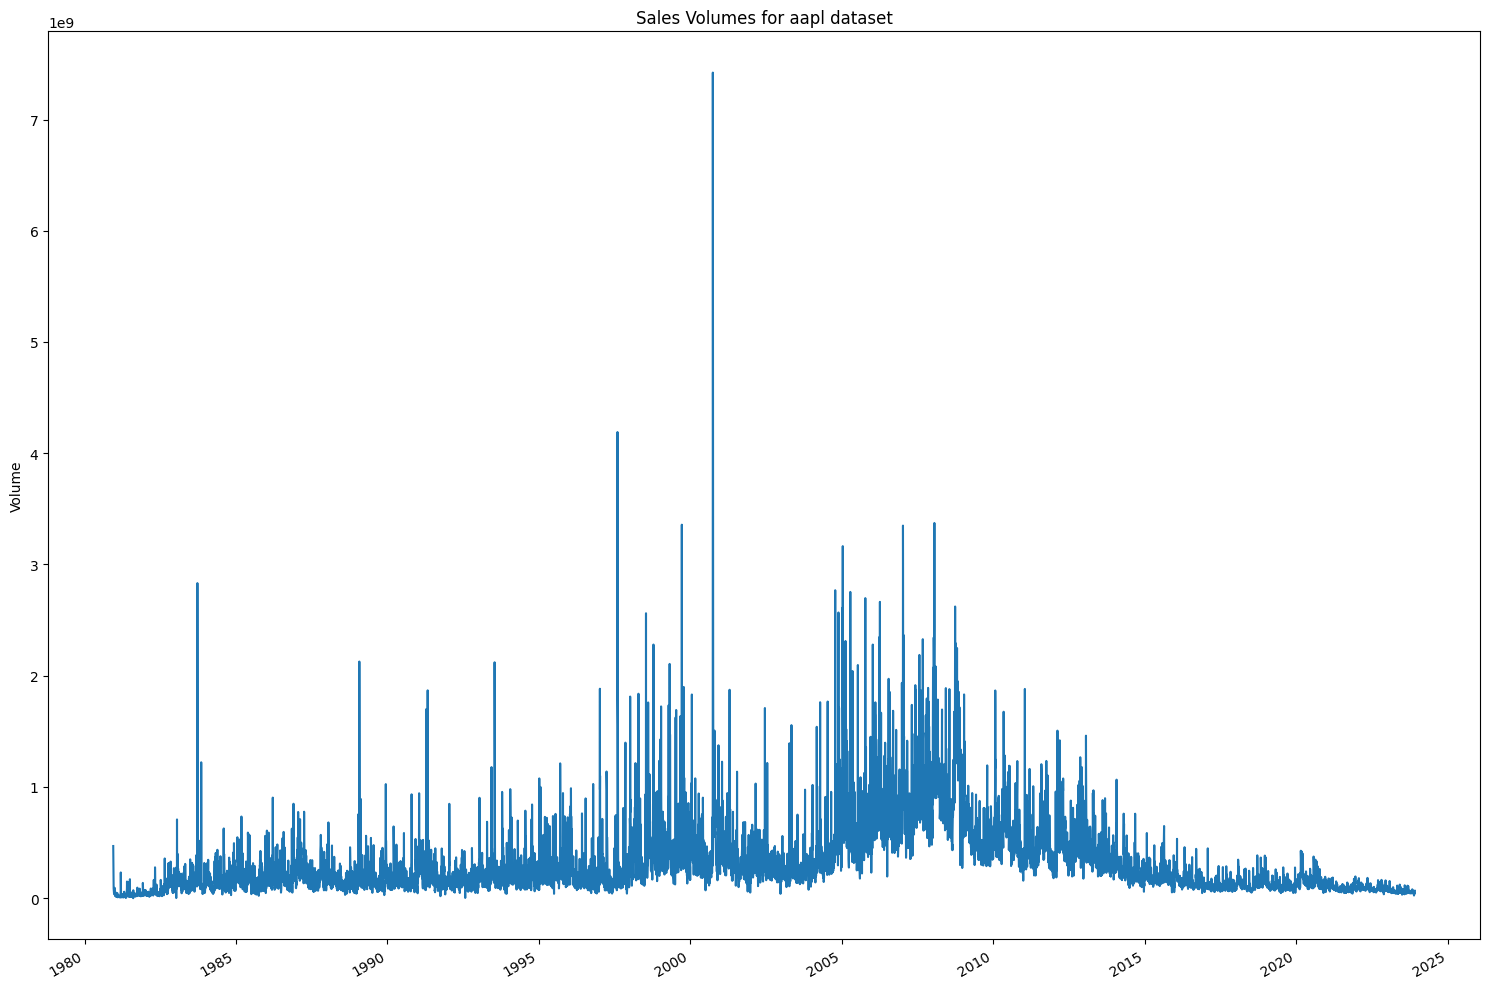

In [92]:
plt.figure(figsize=(15,10))
aapl['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volumes for aapl dataset")
plt.tight_layout()

# what was the moving average of the stocks?
moving average price is the technical analysis tool that easy out price data by creating a constantly updated average price over a specific period of time.

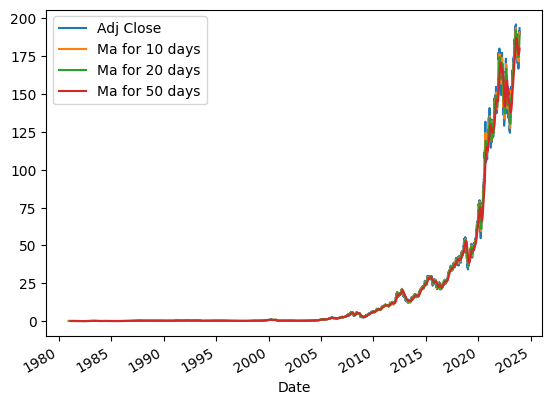

In [93]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = f"Ma for {ma} days"
    aapl[column_name] = aapl['Adj Close'].rolling(ma).mean()

aapl[['Adj Close','Ma for 10 days','Ma for 20 days','Ma for 50 days']].plot()
axes.set_title('APPLE')
fig.tight_layout()


# *What was the daily return of the stock on average*

Text(0.5, 1.0, 'APPLE')

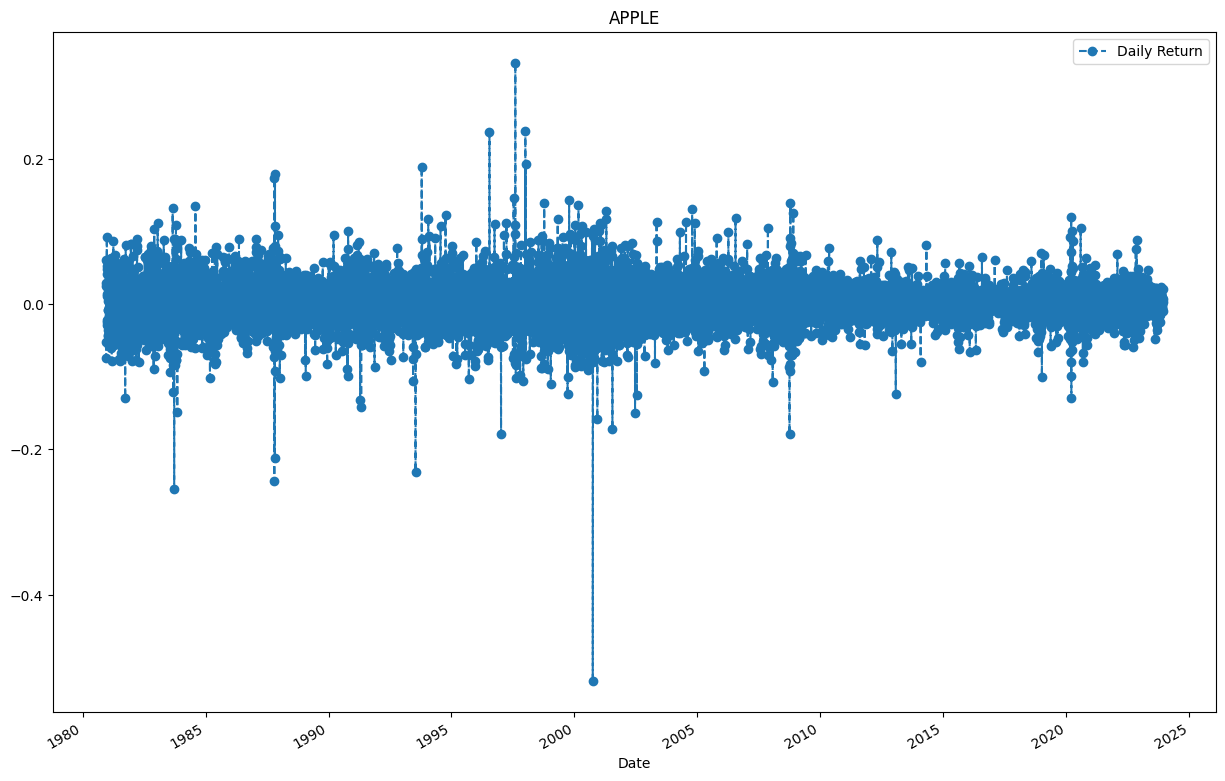

In [94]:
aapl['Daily Return'] = aapl['Adj Close'].pct_change()
fig,axes = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

aapl['Daily Return'].plot(legend=True,linestyle='--',marker='o')
axes.set_title('APPLE')

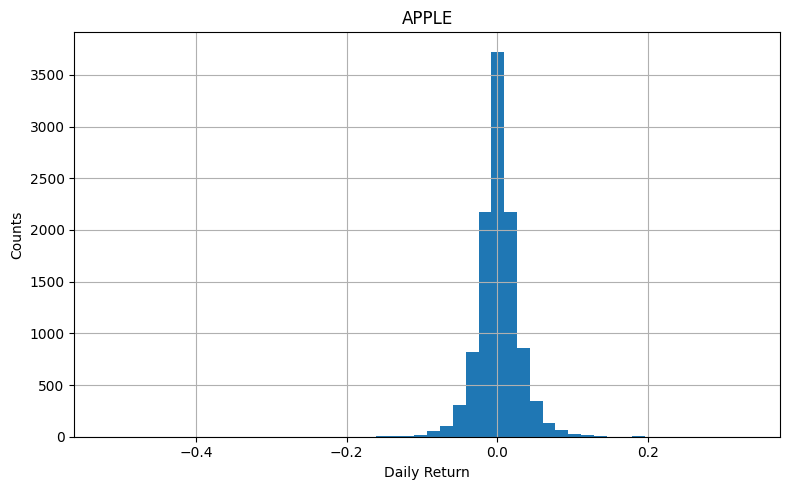

In [95]:
plt.figure(figsize = (8,5))
aapl['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('APPLE')
plt.tight_layout()

# *Correlation of different stock*



In [121]:
#aapl.drop(["Ma for 10 days","Ma for 20 days","Ma for 50 days"],axis=1)
corr = aapl.corr(numeric_only = True)
corr['Adj Close'].sort_values(ascending=False)


Adj Close    1.000000
Close        0.999770
High         0.999705
Low          0.999705
Open         0.999628
Volume      -0.241499
Name: Adj Close, dtype: float64

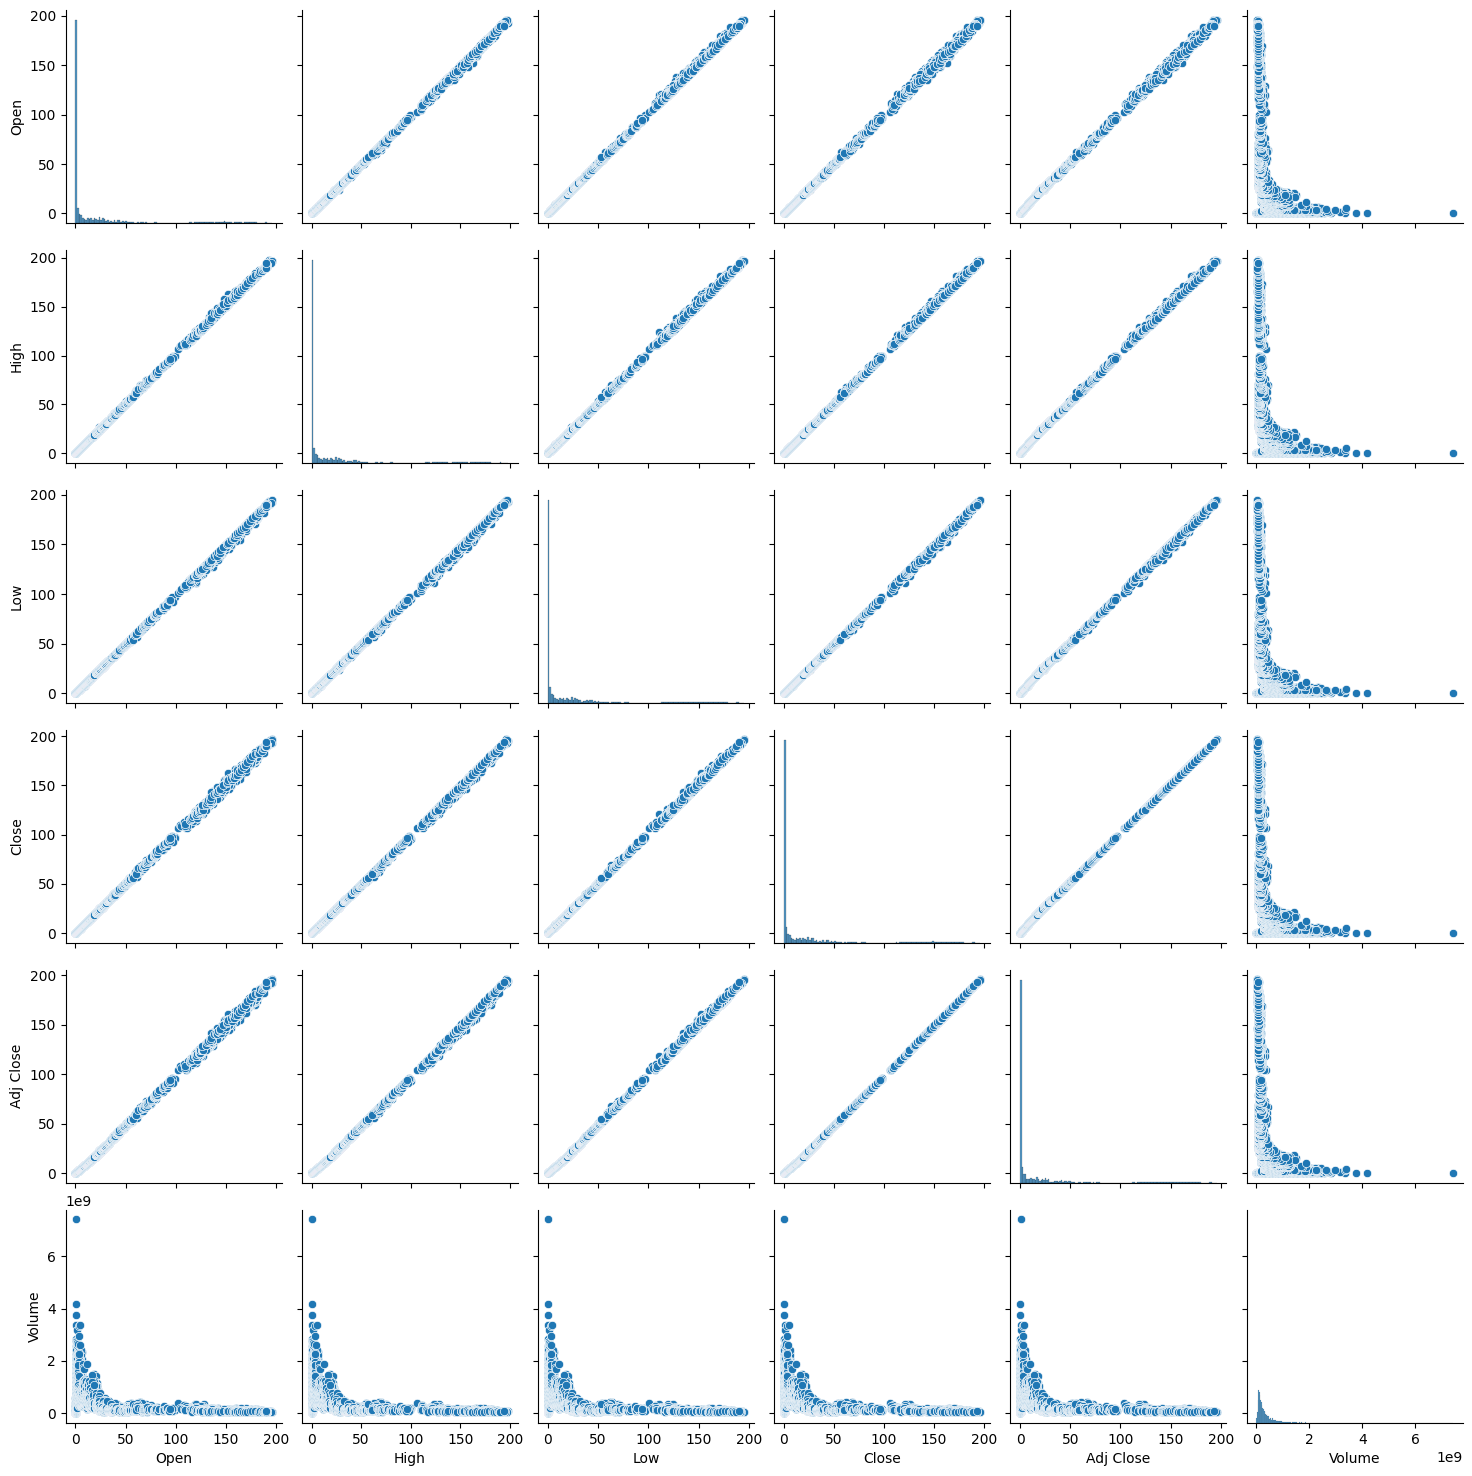

In [122]:
sns.pairplot(aapl)
plt.show()

plt.figure(figsize=(9,5))
sns.heatmap(corr,cmap = "coolwarm",annot=True,linewidth = .5)

# *Predicting the closing price stock price of AAPLE using LSTM*

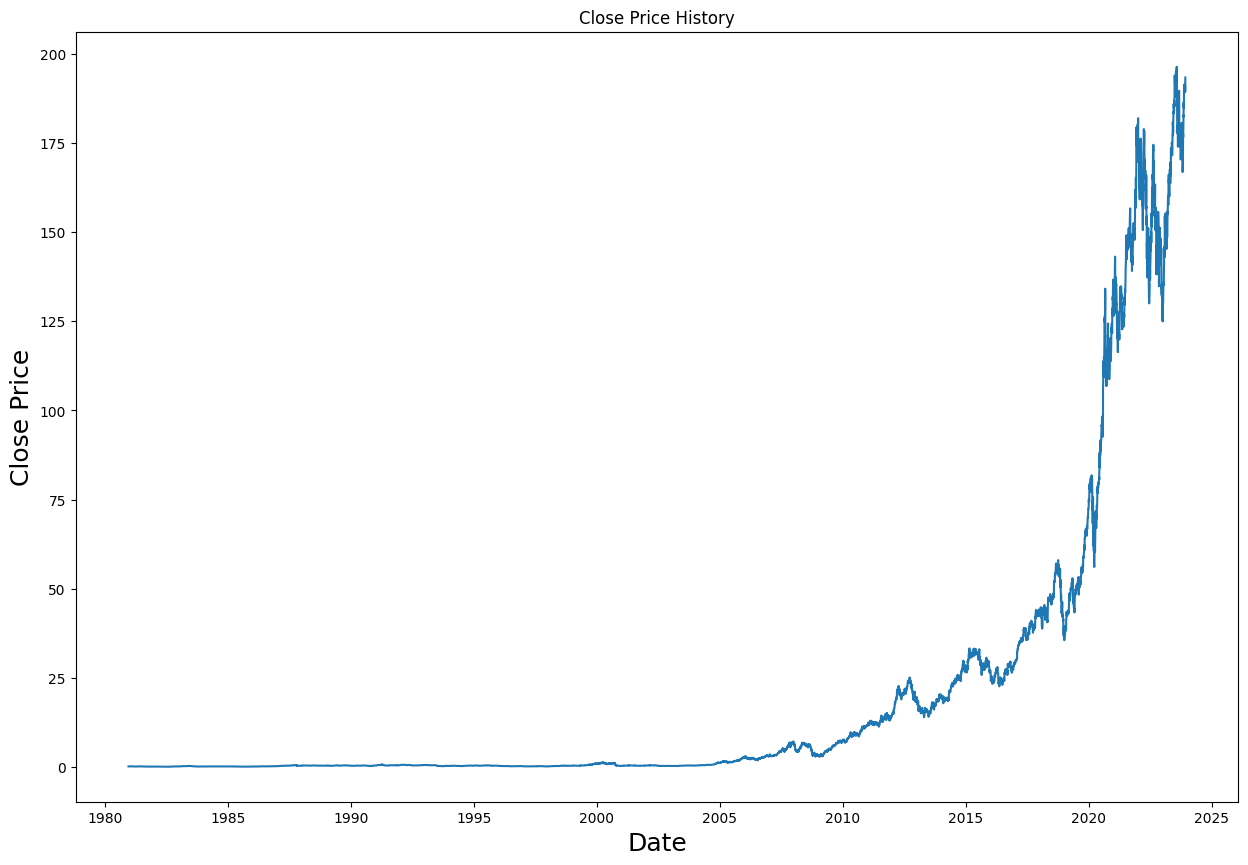

In [124]:
plt.figure(figsize = (15,10))
plt.title("Close Price History")
plt.plot(aapl['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price",fontsize=18)
plt.show()

# split of the dataset

In [296]:
#select feature for LSTM 
features = ['High','Low','Adj Close','Volume']
target = 'Close'

X_ = aapl[features].values
y_ = aapl[target].values

#splitting the train dataset
training_data_len = int(len(data)*0.8)
X_train,X_test = X_[:training_data_len],X_[training_data_len:]
y_train,y_test = y_[:training_data_len],y_[training_data_len:]

#reshape X_train and X_test
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

ms_x = MinMaxScaler()
x_train_scaled = ms_x.fit_transform(X_train)
x_test_scaled = ms_x.transform(X_test)

ms_y = MinMaxScaler()
y_train_scaled = ms_y.fit_transform(y_train)
y_test_scaled = ms_y.transform(y_test)

print(x_test_scaled.shape)
print(y_test_scaled.shape)

(2168, 4)
(2168, 1)


In [338]:
def create_sequence(X,y,steps = 30):
    x_seq = []
    y_seq = []

    for i in range(steps,len(X)):
        x_seq.append(X[i-steps:i, :])
        y_seq.append(y[i])
    return np.array(x_seq),np.array(y_seq)
    
#Create sequences for training
X_train,y_train = create_sequence(x_train_scaled,y_train_scaled,steps)
X_test,y_test = create_sequence(x_test_scaled,y_test_scaled,steps)

#reshape the dataset
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],4))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],4))


In [346]:
#training

model = Sequential()
model.add(LSTM(128,return_sequences = True,input_shape=(X_train.shape[1],4)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam',loss = "mean_squared_error")

model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 60, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,155 (465.45 KB)

 Trainable params: 119,155 (465.45 KB)

 Non-trainable params: 0 (0.00 B)

In [349]:
#train model
model.fit(X_train,y_train,
          batch_size=16,
          epochs=20,
          validation_data=(X_test,y_test))


Epoch 1/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - loss: 5.4199e-05 - val_loss: 2.7102
Epoch 2/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 4.1577e-05 - val_loss: 2.4882
Epoch 3/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 5.1512e-05 - val_loss: 2.3128
Epoch 4/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 4.6881e-05 - val_loss: 2.0747
Epoch 5/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 4.3422e-05 - val_loss: 1.9602
Epoch 6/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 4.7252e-05 - val_loss: 1.7881
Epoch 7/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 4.4427e-05 - val_loss: 1.4082
Epoch 8/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 5.4708e-05 - val_loss: 1.3052
Epoch 9/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 4.4258e-05 - val_loss: 1.0589
Epoch 10/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 4.7527e-05 - val_loss: 0.9873
Epoch 11/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 4.8162e-05 - val

In [367]:
test_predicted = model.predict(X_test)
test_inverse_predicted = ms_y.inverse_transform(test_predicted)
y_test_inverse = y_test



print(ms_y.data_min_,ms_y.data_max_)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 
[0.049107] [33.25]


In [366]:
#LSTM metrics
mae_lstm = mean_absolute_error(y_test_inverse,test_inverse_predicted)
mse_lstm = mean_squared_error(y_test_inverse,test_inverse_predicted)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_inverse,test_inverse_predicted)

print("mae",mae_lstm)
print("mse",mse_lstm)
print("r2",r2_lstm)
print("rmse",rmse_lstm)

mae 67.08647257124446
mse 5673.170686492293
r2 -2029.033691513097
rmse 75.32045330779876


# *Prediction of the closing Price using Linear Regression*


In [320]:
features = ["Open","High","Low","Adj Close","Volume"]
target = "Close"

X = aapl[features]
y = aapl[target]


In [321]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [322]:
#scaling of data
X_scaled_train = ms.fit_transform(X_train)
X_scaled_test = ms.transform(X_test)

In [323]:
#Train the mmodel
model = LinearRegression()
model.fit(X_scaled_train,y_train)

LinearRegression()

In [324]:
print(type(X_train))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [325]:
open_price_predictions = model.predict(X_scaled_test)
open_price_predictions

array([ 0.35506086, 20.53585652,  0.17705372, ...,  4.78644395,
        0.18848333,  2.60997193])

In [326]:
from sklearn.metrics import mean_squared_error,r2_score


0.08364051290123178

In [327]:
#Evaluation of the regression model
mae_lr = mean_absolute_error(y_test, open_price_predictions)
mse_lr = mean_squared_error(y_test,open_price_predictions)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, open_price_predictions)



In [329]:
print(f"mae,{mae_lr} ")
print("mse",mse_lr)
print("rmse",rmse_lr)
print("r2",r2_lr)

mae,0.1308141280971735 
mse 0.08364051290123178
rmse 0.28920669580981656
r2 0.9999504877054456
